Resultado da busca em largura por níveis: {0: [1], 1: [2, 3], 2: [4, 5, 6, 7]}


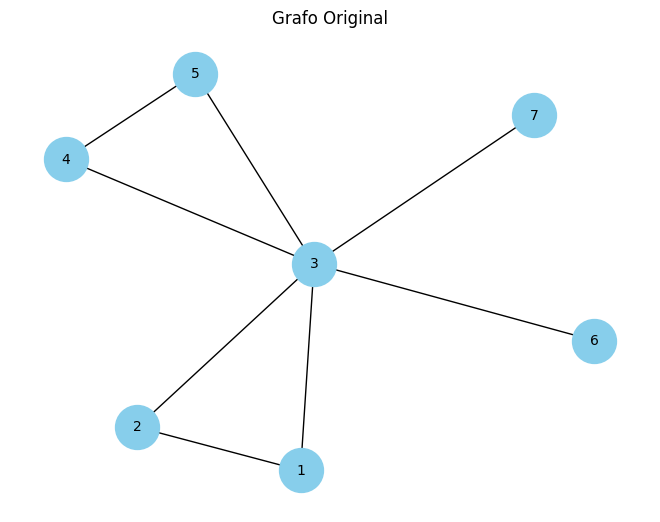

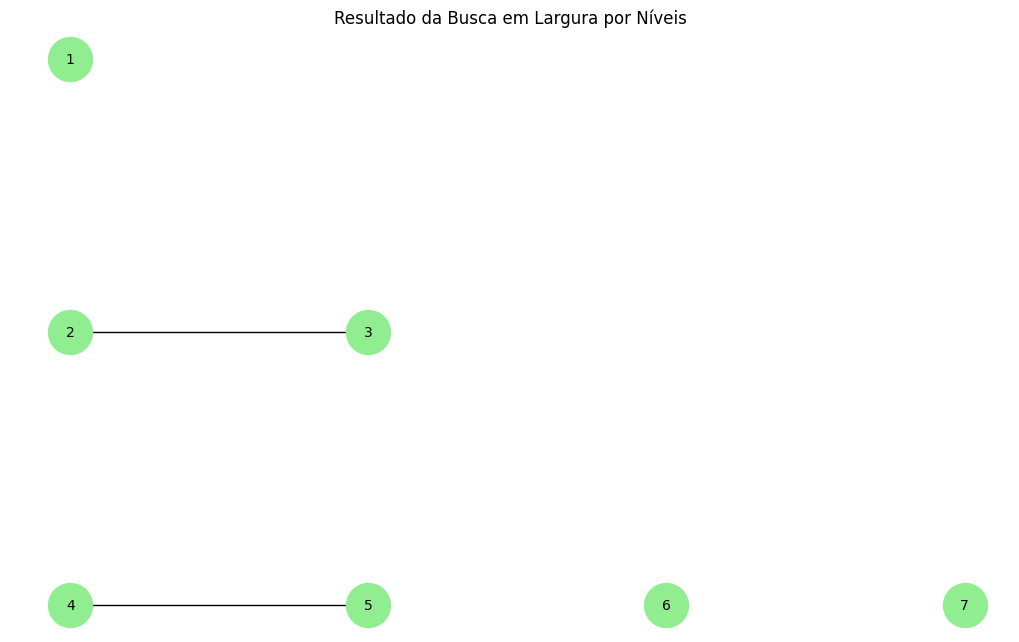

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Definindo o grafo
edges = [(1, 2), (1, 3), (2, 3), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5)]
G = nx.Graph()
G.add_edges_from(edges)

def bfs_levels(graph, start_node):
    visited = set()
    queue = deque([(start_node, 0)])  # Adicionando o nível ao par (nó, nível)
    bfs_result = {}

    while queue:
        node, level = queue.popleft()
        if node not in visited:
            visited.add(node)
            if level not in bfs_result:
                bfs_result[level] = []
            bfs_result[level].append(node)
            queue.extend((neighbor, level + 1) for neighbor in graph[node] if neighbor not in visited)

    return bfs_result

# Realizando a busca em largura a partir do vértice 1
bfs_levels_result = bfs_levels(G, 1)
print("Resultado da busca em largura por níveis:", bfs_levels_result)

# Plotando o grafo original
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, font_size=10)
plt.title("Grafo Original")
plt.show()

# Plotando o subgrafo resultante da busca em largura por níveis
plt.figure(figsize=(10, 6))
for level, nodes in bfs_levels_result.items():
    y_offset = -level  # Ajuste para espaçar os níveis verticalmente
    pos_level = {node: (idx, y_offset) for idx, node in enumerate(nodes)}
    nx.draw(G.subgraph(nodes), pos_level, with_labels=True, node_color='lightgreen', node_size=1000, font_size=10)
plt.title("Resultado da Busca em Largura por Níveis")
plt.show()